In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
os.getcwd()

'C:\\Users\\Pablo\\Desktop\\Machine Learning I Project I'

In [3]:
with open('./application_train.csv') as file:
    train = pd.read_csv(file)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#train['TARGET'].shape
train.shape

In [ ]:
train.describe()

In [ ]:
pd.options.display.max_rows = 200
print(train.dtypes)
print(train.info())

In [ ]:
train.head(10)

In [ ]:
for col in train.columns:
    if isinstance(col, float):
        col = train[col]
        col.log = np.log(col)

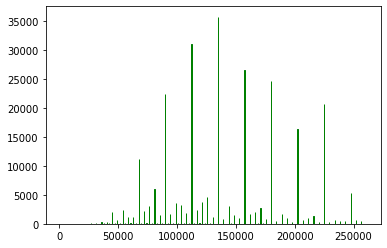

In [7]:
#Useful transformations:
#fig, axes = plt.subplots(1, 2)
AMT_INCOME_TOTAL = train['AMT_INCOME_TOTAL']
AMT_INCOME_TOTAL.log = np.log(AMT_INCOME_TOTAL)
plt.hist(AMT_INCOME_TOTAL, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
#plt.hist(AMT_INCOME_TOTAL.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

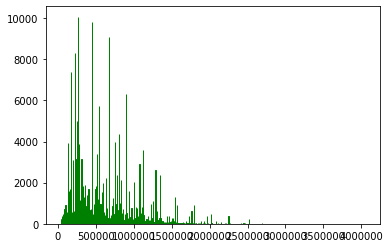

In [9]:
AMT_CREDIT = train['AMT_CREDIT']
AMT_CREDIT.log = np.log(AMT_CREDIT)
# plt.hist(AMT_CREDIT, range=[40000, 4050000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_CREDIT.log, range=[5, 20], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
AMT_ANNUITY = train['AMT_ANNUITY']
AMT_ANNUITY.log = np.log(AMT_ANNUITY)
#plt.hist(AMT_ANNUITY, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_ANNUITY.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data
#sns.distplot(total_income, hist=True, kde=False, bins=20, color='blue', hist_kws={'edgecolor':'green'})

In [ ]:
AMT_GOODS_PRICE = train['AMT_GOODS_PRICE']
AMT_GOODS_PRICE.log = np.log(AMT_GOODS_PRICE)
#plt.hist(AMT_GOODS_PRICE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_GOODS_PRICE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
REGION_POPULATION_RELATIVE = train['REGION_POPULATION_RELATIVE']
REGION_POPULATION_RELATIVE.log = np.log(REGION_POPULATION_RELATIVE)
#plt.hist(REGION_POPULATION_RELATIVE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(REGION_POPULATION_RELATIVE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
DAYS_REGISTRATION = train['DAYS_REGISTRATION']
DAYS_REGISTRATION.log = np.log(DAYS_REGISTRATION)
#plt.hist(DAYS_REGISTRATION, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(DAYS_REGISTRATION.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
OWN_CAR_AGE = train['OWN_CAR_AGE']
OWN_CAR_AGE.log = np.log(OWN_CAR_AGE)
#plt.hist(OWN_CAR_AGE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(OWN_CAR_AGE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
CNT_FAM_MEMBERS = train['CNT_FAM_MEMBERS']
CNT_FAM_MEMBERS.log = np.log(CNT_FAM_MEMBERS)
#plt.hist(CNT_FAM_MEMBERS, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(CNT_FAM_MEMBERS.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
EXT_SOURCE_1 = train['EXT_SOURCE_1'] #normalized score from external data source
EXT_SOURCE_1.log = np.log(EXT_SOURCE_1)
#plt.hist(EXT_SOURCE_1, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(EXT_SOURCE_1.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
EXT_SOURCE_2 = train['EXT_SOURCE_2']
EXT_SOURCE_2.log = np.log(EXT_SOURCE_2)
#plt.hist(EXT_SOURCE_2, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(EXT_SOURCE_2.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
EXT_SOURCE_3 = train['EXT_SOURCE_3']
EXT_SOURCE_3.log = np.log(EXT_SOURCE_3)
#plt.hist(EXT_SOURCE_3, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(EXT_SOURCE_3.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
APARTMENTS_AVG = train['APARTMENTS_AVG']
APARTMENTS_AVG.log = np.log(APARTMENTS_AVG)
#plt.hist(APARTMENTS_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(APARTMENTS_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
BASEMENTAREA_AVG = train['BASEMENTAREA_AVG']
BASEMENTAREA_AVG.log = np.log(BASEMENTAREA_AVG)
#plt.hist(BASEMENTAREA_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(BASEMENTAREA_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
YEARS_BEGINEXPLUATATION_AVG = train['YEARS_BEGINEXPLUATATION_AVG'] # Normalized information about building where the client lives
YEARS_BEGINEXPLUATATION_AVG.log = np.log(YEARS_BEGINEXPLUATATION_AVG)
#plt.hist(YEARS_BEGINEXPLUATATION_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(YEARS_BEGINEXPLUATATION_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
YEARS_BUILD_AVG = train['YEARS_BUILD_AVG']
YEARS_BUILD_AVG.log = np.log(YEARS_BUILD_AVG)
#plt.hist(YEARS_BUILD_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(YEARS_BUILD_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
COMMONAREA_AVG = train['COMMONAREA_AVG']
COMMONAREA_AVG.log = np.log(COMMONAREA_AVG)
#plt.hist(COMMONAREA_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(COMMONAREA_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
ELEVATORS_AVG = train['ELEVATORS_AVG']
ELEVATORS_AVG.log = np.log(ELEVATORS_AVG)
#plt.hist(ELEVATORS_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(ELEVATORS_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
ENTRANCES_AVG = train['ENTRANCES_AVG']
ENTRANCES_AVG.log = np.log(ENTRANCES_AVG)
#plt.hist(ENTRANCES_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(ENTRANCES_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
FLOORSMAX_AVG = train['FLOORSMAX_AVG']
FLOORSMAX_AVG.log = np.log(FLOORSMAX_AVG)
#plt.hist(FLOORSMAX_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(FLOORSMAX_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
FLOORSMIN_AVG = train['FLOORSMIN_AVG']
FLOORSMIN_AVG.log = np.log(FLOORSMIN_AVG)
#plt.hist(FLOORSMIN_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(FLOORSMIN_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LANDAREA_AVG = train['LANDAREA_AVG']
LANDAREA_AVG.log = np.log(LANDAREA_AVG)
#plt.hist(LANDAREA_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LANDAREA_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LIVINGAPARTMENTS_AVG = train['LIVINGAPARTMENTS_AVG']
LIVINGAPARTMENTS_AVG.log = np.log(LIVINGAPARTMENTS_AVG)
#plt.hist(LIVINGAPARTMENTS_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LIVINGAPARTMENTS_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LIVINGAREA_AVG = train['LIVINGAREA_AVG']
LIVINGAREA_AVG.log = np.log(LIVINGAREA_AVG)
#plt.hist(LIVINGAREA_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LIVINGAREA_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
NONLIVINGAPARTMENTS_AVG = train['NONLIVINGAPARTMENTS_AVG']
NONLIVINGAPARTMENTS_AVG.log = np.log(NONLIVINGAPARTMENTS_AVG)
#plt.hist(NONLIVINGAPARTMENTS_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(NONLIVINGAPARTMENTS_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
NONLIVINGAREA_AVG = train['NONLIVINGAREA_AVG']
NONLIVINGAREA_AVG.log = np.log(NONLIVINGAREA_AVG)
#plt.hist(NONLIVINGAREA_AVG, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(NONLIVINGAREA_AVG.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
APARTMENTS_MODE = train['APARTMENTS_MODE']
APARTMENTS_MODE.log = np.log(apartments_mode)
#plt.hist(APARTMENTS_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(APARTMENTS_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
BASEMENTAREA_MODE = train['BASEMENTAREA_MODE']
BASEMENTAREA_MODE.log = np.log(basement_area_mode)
#plt.hist(BASEMENTAREA_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(BASEMENTAREA_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
YEARS_BEGINEXPLUATATION_MODE = train['YEARS_BEGINEXPLUATATION_MODE']
YEARS_BEGINEXPLUATATION_MODE.log = np.log(YEARS_BEGINEXPLUATATION_MODE)
#plt.hist(YEARS_BEGINEXPLUATATION_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(YEARS_BEGINEXPLUATATION_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
YEARS_BUILD_MODE = train['YEARS_BUILD_MODE']
YEARS_BUILD_MODE.log = np.log(YEARS_BUILD_MODE)
#plt.hist(YEARS_BUILD_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(YEARS_BUILD_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
COMMONAREA_MODE = train['COMMONAREA_MODE']
COMMONAREA_MODE.log = np.log(COMMONAREA_MODE)
#plt.hist(COMMONAREA_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(COMMONAREA_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
ELEVATORS_MODE = train['ELEVATORS_MODE']
ELEVATORS_MODE.log = np.log(ELEVATORS_MODE)
#plt.hist(ELEVATORS_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(ELEVATORS_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
ENTRANCES_MODE = train['ENTRANCES_MODE']
ENTRANCES_MODE.log = np.log(ENTRANCES_MODE)
#plt.hist(ENTRANCES_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(ENTRANCES_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
FLOORSMAX_MODE = train['FLOORSMAX_MODE']
FLOORSMAX_MODE.log = np.log(FLOORSMAX_MODE)
#plt.hist(FLOORSMAX_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(FLOORSMAX_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
FLOORSMIN_MODE = train['FLOORSMIN_MODE']
FLOORSMIN_MODE.log = np.log(FLOORSMIN_MODE)
#plt.hist(FLOORSMIN_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000) # raw data
plt.hist(FLOORSMIN_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LANDAREA_MODE = train['LANDAREA_MODE']
LANDAREA_MODE.log = np.log(LANDAREA_MODE)
#plt.hist(LANDAREA_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LANDAREA_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LIVINGAPARTMENTS_MODE = train['LIVINGAPARTMENTS_MODE']
LIVINGAPARTMENTS_MODE.log = np.log(LIVINGAPARTMENTS_MODE)
#plt.hist(LIVINGAPARTMENTS_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LIVINGAPARTMENTS_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LIVINGAREA_MODE = train['LIVINGAREA_MODE']
LIVINGAREA_MODE.log = np.log(LIVINGAREA_MODE)
#plt.hist(LIVINGAREA_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LIVINGAREA_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
NONLIVINGAPARTMENTS_MODE = train['NONLIVINGAPARTMENTS_MODE']
NONLIVINGAPARTMENTS_MODE.log = np.log(NONLIVINGAPARTMENTS_MODE)
#plt.hist(NONLIVINGAPARTMENTS_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(NONLIVINGAPARTMENTS_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
NONLIVINGAREA_MODE = train['NONLIVINGAREA_MODE']
NONLIVINGAREA_MODE.log = np.log(NONLIVINGAREA_MODE)
#plt.hist(NONLIVINGAREA_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(NONLIVINGAREA_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
APARTMENTS_MEDI = train['APARTMENTS_MEDI']
APARTMENTS_MEDI.log = np.log(APARTMENTS_MEDI)
#plt.hist(APARTMENTS_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(APARTMENTS_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
BASEMENTAREA_MEDI = train['BASEMENTAREA_MEDI']
BASEMENTAREA_MEDI.log = np.log(BASEMENTAREA_MEDI)
#plt.hist(BASEMENTAREA_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(BASEMENTAREA_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
YEARS_BEGINEXPLUATATION_MEDI = train['YEARS_BEGINEXPLUATATION_MEDI']
YEARS_BEGINEXPLUATATION_MEDI.log = np.log(YEARS_BEGINEXPLUATATION_MEDI)
#plt.hist(YEARS_BEGINEXPLUATATION_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(YEARS_BEGINEXPLUATATION_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
YEARS_BUILD_MEDI = train['YEARS_BUILD_MEDI']
YEARS_BUILD_MEDI.log = np.log(YEARS_BUILD_MEDI)
#plt.hist(YEARS_BUILD_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(YEARS_BUILD_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
COMMONAREA_MEDI = train['COMMONAREA_MEDI']
COMMONAREA_MEDI.log = np.log(COMMONAREA_MEDI)
#plt.hist(COMMONAREA_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(COMMONAREA_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
ELEVATORS_MEDI = train['ELEVATORS_MEDI']
ELEVATORS_MEDI.log = np.log(ELEVATORS_MEDI)
#plt.hist(ELEVATORS_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(ELEVATORS_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
ENTRANCES_MEDI = train['ENTRANCES_MEDI']
ENTRANCES_MEDI.log = np.log(ENTRANCES_MEDI)
#plt.hist(ENTRANCES_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(ENTRANCES_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
FLOORSMAX_MEDI = train['FLOORSMAX_MEDI']
FLOORSMAX_MEDI.log = np.log(FLOORSMAX_MEDI)
#plt.hist(FLOORSMAX_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(FLOORSMAX_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
FLOORSMIN_MEDI = train['FLOORSMIN_MEDI']
FLOORSMIN_MEDI.log = np.log(FLOORSMIN_MEDI)
#plt.hist(FLOORSMIN_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(FLOORSMIN_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LANDAREA_MEDI = train['LANDAREA_MEDI']
LANDAREA_MEDI.log = np.log(LANDAREA_MEDI)
#plt.hist(LANDAREA_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LANDAREA_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LIVINGAPARTMENTS_MEDI = train['LIVINGAPARTMENTS_MEDI']
LIVINGAPARTMENTS_MEDI.log = np.log(LIVINGAPARTMENTS_MEDI)
#plt.hist(LIVINGAPARTMENTS_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LIVINGAPARTMENTS_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
LIVINGAREA_MEDI = train['LIVINGAREA_MEDI']
LIVINGAREA_MEDI.log = np.log(LIVINGAREA_MEDI)
#plt.hist(LIVINGAREA_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(LIVINGAREA_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
NONLIVINGAPARTMENTS_MEDI = train['NONLIVINGAPARTMENTS_MEDI']
NONLIVINGAPARTMENTS_MEDI.log = np.log(NONLIVINGAPARTMENTS_MEDI)
#plt.hist(NONLIVINGAPARTMENTS_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(NONLIVINGAPARTMENTS_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
NONLIVINGAREA_MEDI = train['NONLIVINGAREA_MEDI']
NONLIVINGAREA_MEDI.log = np.log(NONLIVINGAREA_MEDI)
#plt.hist(NONLIVINGAREA_MEDI, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(NONLIVINGAREA_MEDI.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
FONDKAPREMONT_MODE = train['FONDKAPREMONT_MODE']
FONDKAPREMONT_MODE.log = np.log(FONDKAPREMONT_MODE)
#plt.hist(FONDKAPREMONT_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(FONDKAPREMONT_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
TOTALAREA_MODE = train['TOTALAREA_MODE']
TOTALAREA_MODE.log = np.log(TOTALAREA_MODE)
#plt.hist(TOTALAREA_MODE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(TOTALAREA_MODE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
OBS_30_CNT_SOCIAL_CIRCLE = train['OBS_30_CNT_SOCIAL_CIRCLE']
OBS_30_CNT_SOCIAL_CIRCLE.log = np.log(OBS_30_CNT_SOCIAL_CIRCLE)
#plt.hist(OBS_30_CNT_SOCIAL_CIRCLE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(OBS_30_CNT_SOCIAL_CIRCLE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
DEF_30_CNT_SOCIAL_CIRCLE = train['DEF_30_CNT_SOCIAL_CIRCLE']
DEF_30_CNT_SOCIAL_CIRCLE.log = np.log(DEF_30_CNT_SOCIAL_CIRCLE)
#plt.hist(DEF_30_CNT_SOCIAL_CIRCLE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(DEF_30_CNT_SOCIAL_CIRCLE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
OBS_60_CNT_SOCIAL_CIRCLE = train['OBS_60_CNT_SOCIAL_CIRCLE']
OBS_60_CNT_SOCIAL_CIRCLE.log = np.log(OBS_60_CNT_SOCIAL_CIRCLE)
#plt.hist(OBS_60_CNT_SOCIAL_CIRCLE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(OBS_60_CNT_SOCIAL_CIRCLE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
DEF_60_CNT_SOCIAL_CIRCLE = train['DEF_60_CNT_SOCIAL_CIRCLE']
DEF_60_CNT_SOCIAL_CIRCLE.log = np.log(DEF_60_CNT_SOCIAL_CIRCLE)
#plt.hist(DEF_60_CNT_SOCIAL_CIRCLE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(DEF_60_CNT_SOCIAL_CIRCLE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
DAYS_LAST_PHONE_CHANGE = train['DAYS_LAST_PHONE_CHANGE']
DAYS_LAST_PHONE_CHANGE.log = np.log(DAYS_LAST_PHONE_CHANGE)
#plt.hist(DAYS_LAST_PHONE_CHANGE, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(DAYS_LAST_PHONE_CHANGE.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
AMT_REQ_CREDIT_BUREAU_HOUR = train['AMT_REQ_CREDIT_BUREAU_HOUR']
AMT_REQ_CREDIT_BUREAU_HOUR.log = np.log(AMT_REQ_CREDIT_BUREAU_HOUR)
#plt.hist(AMT_REQ_CREDIT_BUREAU_HOUR, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_REQ_CREDIT_BUREAU_HOUR.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
AMT_REQ_CREDIT_BUREAU_DAY = train['AMT_REQ_CREDIT_BUREAU_DAY']
AMT_REQ_CREDIT_BUREAU_DAY.log = np.log(AMT_REQ_CREDIT_BUREAU_DAY)
#plt.hist(AMT_REQ_CREDIT_BUREAU_DAY, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_REQ_CREDIT_BUREAU_DAY.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
AMT_REQ_CREDIT_BUREAU_WEEK = train['AMT_REQ_CREDIT_BUREAU_WEEK']
AMT_REQ_CREDIT_BUREAU_WEEK.log = np.log(AMT_REQ_CREDIT_BUREAU_WEEK)
#plt.hist(AMT_REQ_CREDIT_BUREAU_WEEK, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_REQ_CREDIT_BUREAU_WEEK.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
AMT_REQ_CREDIT_BUREAU_MON = train['AMT_REQ_CREDIT_BUREAU_MON']
AMT_REQ_CREDIT_BUREAU_MON.log = np.log(AMT_REQ_CREDIT_BUREAU_MON)
#plt.hist(AMT_REQ_CREDIT_BUREAU_MON, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_REQ_CREDIT_BUREAU_MON.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
AMT_REQ_CREDIT_BUREAU_QRT = train['AMT_REQ_CREDIT_BUREAU_QRT']
AMT_REQ_CREDIT_BUREAU_QRT.log = np.log(AMT_REQ_CREDIT_BUREAU_QRT)
#plt.hist(AMT_REQ_CREDIT_BUREAU_QRT, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_REQ_CREDIT_BUREAU_QRT.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data

In [ ]:
AMT_REQ_CREDIT_BUREAU_YEAR = train['AMT_REQ_CREDIT_BUREAU_YEAR']
AMT_REQ_CREDIT_BUREAU_YEAR.log = np.log(AMT_REQ_CREDIT_BUREAU_YEAR)
#plt.hist(AMT_REQ_CREDIT_BUREAU_YEAR, range=[1600, 260000], color='blue',edgecolor='green',bins=2000); # raw data
plt.hist(AMT_REQ_CREDIT_BUREAU_YEAR.log, range=[5, 15], color='blue',edgecolor='green',bins=200); # transformed data